In [2]:
from sklearn.linear_model import LinearRegression 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
import datetime
import re

# Trying baseline models : Regression and Classification approaches.

- Why regression? Water levels are continuous variables
- Why classification? whether the rivers are flooding is the key outcome (flood prediction) If classification, where will we get the flood labels? 

https://check-for-flooding.service.gov.uk/river-and-sea-levels/target-area/114WAFT1W01A00?group=rainfall

## Current Data


- 30 river stations

In [9]:
len([f for f in os.listdir('get_river_data/data') if os.path.isfile(os.path.join('get_river_data/data',f))]) # number of files in relevant directory = number of river gauge stations


30

In [11]:
river_stations_cornwall = pd.read_csv('river_station_info_cornwall.csv')
river_stations_cornwall

,id,name,description,latitude,longitude,stationOwner,state,updatedTime,additionalDataObject,gaugeList,stationWaterLevelStatisticsType
0,380,Denby,NaN,50.479652,-4.795633,3,0,2019-03-12T16:29:18.047,"{'stationReference': '49109', 'catchmentName':...","[{'id': 388, 'geoEntityId': 380, 'dataTypeId':...",4
1,382,Helebridge,NaN,50.806427,-4.536459,3,0,2024-07-10T10:38:41.86,"{'stationReference': '49111', 'catchmentName':...","[{'id': 390, 'geoEntityId': 382, 'dataTypeId':...",3
2,384,Bush,NaN,50.844487,-4.509160,3,0,2024-07-10T06:34:57.52,"{'stationReference': '49113', 'catchmentName':...","[{'id': 391, 'geoEntityId': 384, 'dataTypeId':...",2
3,386,Padstow,NaN,50.541745,-4.936932,3,0,2024-07-10T04:41:31.21,"{'stationReference': '49116', 'catchmentName':...","[{'id': 393, 'geoEntityId': 386, 'dataTypeId':...",4
4,387,Penvose,NaN,50.566819,-4.750514,3,0,2024-07-10T04:32:55.55,"{'stationReference': '49117', 'catchmentName':...","[{'id': 394, 'geoEntityId': 387, 'dataTypeId':...",2
5,391,Wadebridge,NaN,50.516704,-4.834983,3,0,2024-07-10T04:36:23.353,"{'stationReference': '49122', 'catchmentName':...","[{'id': 398, 'geoEntityId': 391, 'dataTypeId':...",4
6,393,De Lank,NaN,50.558805,-4.637791,3,0,2024-07-10T09:34:29.83,"{'stationReference': '49129', 'catchmentName':...","[{'id': 400, 'geoEntityId': 393, 'dataTypeId':...",2
7,394,Gwills,NaN,50.393216,-5.056212,3,0,2024-07-10T09:34:56.163,"{'stationReference': '49130', 'catchmentName':...","[{'id': 401, 'geoEntityId': 394, 'dataTypeId':...",2
8,395,Slaughterbridge,NaN,50.640434,-4.675177,3,0,2022-01-12T14:48:50.117,"{'stationReference': '49131', 'catchmentName':...","[{'id': 402, 'geoEntityId': 395, 'dataTypeId':...",4
9,397,Sladesbridge,NaN,50.509313,-4.804805,3,0,2024-07-10T06:44:06.73,"{'stationReference': '49133', 'catchmentName':...","[{'id': 404, 'geoEntityId': 397, 'dataTypeId':...",2


In [13]:
river_stations_cornwall[river_stations_cornwall['updatedTime'] == river_stations_cornwall['updatedTime'].max()]

,id,name,description,latitude,longitude,stationOwner,state,updatedTime,additionalDataObject,gaugeList,stationWaterLevelStatisticsType
14,1351,Bodmin St Petrocs Well,NaN,50.468464,-4.713131,3,0,2024-07-10T11:35:45.107,"{'stationReference': '49153', 'catchmentName':...","[{'id': 1495, 'geoEntityId': 1351, 'dataTypeId...",2


In [ ]:
river_stations_cornwall[river_stations_cornwall['updatedTime'] == river_stations_cornwall['updatedTime'].max()]

In [19]:
river_stations_cornwall['updatedTime'] = pd.to_datetime(river_stations_cornwall['updatedTime'],format='ISO8601')

In [25]:
relevant_stations = river_stations_cornwall[river_stations_cornwall['updatedTime'].dt.year == 2024] # Filtering by stations still recording data


In [28]:
relevant_stations['id'].tolist()

[382,
 384,
 386,
 387,
 391,
 393,
 394,
 397,
 398,
 400,
 1349,
 1351,
 1352,
 8340,
 17891,
 355,
 357,
 358,
 361,
 362,
 364,
 365,
 370,
 375,
 1335,
 1339,
 1340,
 1341,
 1342,
 8227,
 14453,
 14454]

In [22]:
station_ids_downloaded_data = [int(num) for filename in os.listdir('get_river_data/data') for num in re.findall(r'\d+', filename)]

In [31]:
ids = [station for station in station_ids_downloaded_data if station in relevant_stations['id'].tolist()]

In [32]:
ids

[397,
 1352,
 17891,
 400,
 1340,
 355,
 382,
 1341,
 384,
 361,
 364,
 370,
 8227,
 398,
 8340,
 393,
 387,
 1342,
 357,
 1335,
 362,
 14454,
 1351,
 394,
 14453,
 365,
 1339]

In [34]:
to_delete = [station for station in station_ids_downloaded_data if station not in ids]

In [35]:
to_delete # these we've downloaded, and don't collect data anymore

[395, 8256, 380]

In [44]:
# Lets try out station 355 with a regression model 

station_355 = pd.read_csv('get_river_data/data/station_355_clean.csv')

In [45]:
station_355.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244105 entries, 0 to 244104
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    244105 non-null  object 
 1   value   244105 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [46]:
station_355['time'] = pd.to_datetime(station_355['time'], format = 'ISO8601')

In [47]:
station_355.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244105 entries, 0 to 244104
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    244105 non-null  datetime64[ns]
 1   value   244105 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 MB


Now the river data looks ready. We're going to use the weather data for the same time period as the features for the regression model. We need to merge on timing - how exactly? 

In [54]:
weather_data = pd.read_csv('all_weather_data_cornwall.csv',index_col=-1)

In [56]:
 weather_data.drop(columns="Unnamed: 0", inplace=True)

In [58]:
weather_data.info()    

<class 'pandas.core.frame.DataFrame'>
Index: 1346979 entries, 3817 to 3839
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   time    1346979 non-null  object 
 1   temp    1345639 non-null  float64
 2   dwpt    1342671 non-null  float64
 3   rhum    1342671 non-null  float64
 4   prcp    179437 non-null   float64
 5   snow    1702 non-null     float64
 6   wdir    1273265 non-null  float64
 7   wspd    1300322 non-null  float64
 8   wpgt    362173 non-null   float64
 9   pres    1163489 non-null  float64
 10  tsun    148 non-null      float64
 11  coco    426336 non-null   float64
dtypes: float64(11), object(1)
memory usage: 133.6+ MB


- snow, tsun are almost all-nulls. Drop

In [59]:
weather_data.drop(columns=['tsun','snow'],inplace=True)

In [60]:
weather_data

,time,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,coco
station_id,,,,,,,,,,
3817,2000-03-04 07:00:00,2.6,-1.9,72.0,NaN,360.0,1.8,NaN,1029.2,NaN
3817,2000-03-04 08:00:00,2.7,-1.1,76.0,NaN,350.0,5.4,NaN,1030.1,NaN
3817,2000-03-04 09:00:00,5.2,-0.2,68.0,NaN,360.0,7.6,NaN,1031.0,NaN
3817,2000-03-04 10:00:00,6.1,-1.8,57.0,NaN,360.0,13.0,NaN,1031.5,NaN
3817,2000-03-04 11:00:00,6.5,-1.9,55.0,NaN,340.0,18.4,NaN,1032.1,NaN
...,...,...,...,...,...,...,...,...,...,...
3839,2024-07-15 11:00:00,16.7,13.2,80.0,2.8,118.0,18.5,29.6,1006.6,7.0
3839,2024-07-15 12:00:00,17.1,13.4,79.0,1.1,117.0,16.7,25.9,1006.3,7.0
3839,2024-07-15 13:00:00,17.0,13.5,80.0,0.5,125.0,14.8,24.1,1006.1,8.0


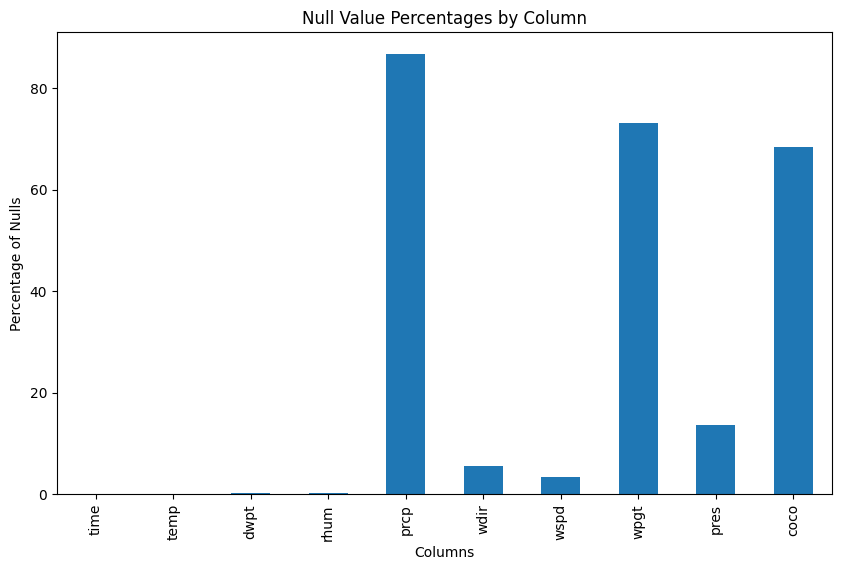

In [61]:
null_percentage = weather_data.isnull().mean().groupby() * 100

# Plot the null percentages
null_percentage.plot(kind='bar', figsize=(10, 6))
plt.title('Null Value Percentages by Column')
plt.ylabel('Percentage of Nulls')
plt.xlabel('Columns')
plt.show()

## weather data has too many nulls. Back to the drawing board

Let's try Metoffice DataPoint API 

In [75]:
import requests
import pandas as pd

# Your API Key
api_key = 'faeed709-72d6-4b0d-85a0-92f73243d301'

# Met Office base URL
base_url = 'http://datapoint.metoffice.gov.uk/public/data/'

# Endpoint for the latest observation data (replace with your preferred endpoint)
endpoint = 'val/wxobs/all/json/sitelist'


# Construct the full API request URL with your API key
request_url = f"{base_url}{endpoint}?key={api_key}"

# Send the request to the API
response = requests.get(request_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response into a dictionary
    data = response.json()

    # Convert the JSON data to a pandas DataFrame (depending on your API response structure)
    weather_data = pd.DataFrame(data['Locations']['Location'])

    # Display the first few rows
    print(weather_data.head())

else:
    print(f"Error: Unable to fetch data. Status code {response.status_code}")


  elevation    id latitude longitude                        name region  \
0       7.0  3066  57.6494   -3.5606                     Kinloss     gr   
1       6.0  3068   57.712    -3.322                 Lossiemouth     gr   
2      36.0  3075   58.454    -3.089  Wick John O Groats Airport     he   
3      15.0  3002   60.749    -0.854                  Baltasound     os   
4      82.0  3005   60.139    -1.183         Lerwick (S. Screen)     os   

    unitaryAuthArea obsSource nationalPark  
0             Moray       NaN          NaN  
1             Moray    LNDSYN          NaN  
2          Highland    LNDSYN          NaN  
3  Shetland Islands       NaN          NaN  
4  Shetland Islands    LNDSYN          NaN  


In [76]:
weather_data

,elevation,id,latitude,longitude,name,region,unitaryAuthArea,obsSource,nationalPark
0,7.0,3066,57.6494,-3.5606,Kinloss,gr,Moray,NaN,NaN
1,6.0,3068,57.712,-3.322,Lossiemouth,gr,Moray,LNDSYN,NaN
2,36.0,3075,58.454,-3.089,Wick John O Groats Airport,he,Highland,LNDSYN,NaN
3,15.0,3002,60.749,-0.854,Baltasound,os,Shetland Islands,NaN,NaN
4,82.0,3005,60.139,-1.183,Lerwick (S. Screen),os,Shetland Islands,LNDSYN,NaN
...,...,...,...,...,...,...,...,...,...
142,8.0,3385,53.473,0.154,Donna Nook,em,Lincolnshire,LNDSYN,NaN
143,6.0,3391,53.094,-0.171,Coningsby,em,Lincolnshire,NaN,NaN
144,110.0,99142,54.273,-0.421,Scarborough,yh,North Yorkshire,NaN,NaN
145,206.0,996,56.69936,-4.19345,Loch Rannoch,ta,Perth and Kinross,NaN,NaN


In [77]:
weather_data[weather_data['unitaryAuthArea'] == 'Cornwall']

,elevation,id,latitude,longitude,name,region,unitaryAuthArea,obsSource,nationalPark
13,200.0,3823,50.502,-4.667,Cardinham,sw,Cornwall,NaN,NaN
47,78.0,3809,50.085,-5.257,Culdrose,sw,Cornwall,LNDSYN,NaN
94,87.0,3808,50.218,-5.33,Camborne,sw,Cornwall,NaN,NaN


In [65]:
cornwall_met_office_weather_station_ids = [13,47,94]

In [ ]:
# API references here : https://www.metoffice.gov.uk/services/data/datapoint/api-reference

In [67]:
# Pull forecasts

# For 3-hourly forecasts: val/wxfcs/all/json/{location_id}?res=3hourly&key=YOUR_API_KEY
# For hourly observations: val/wxobs/all/json/{location_id}?key=YOUR_API_KEY

In [68]:
def pull_forecast(location_id: int, time_scale: int = None):
    api_key = input('Enter your Met Office API key:')
    base_url = 'http://datapoint.metoffice.gov.uk/public/data/'
    
    if time_scale:
        if time_scale == 1:
            URL = f"{base_url}val/wxobs/all/json/{location_id}?key={api_key}"
        elif time_scale == 3:
            URL = f"{base_url}val/wxfcs/all/json/{location_id}?res=3hourly&key={api_key}"
        else:
            print('Choose time scale, integer, either 1 or 3')
            return None
        res = requests.get(URL)
        return res
    else:
        print('Invalid input')     


In [78]:
res = pull_forecast(location_id=47,time_scale=3)

In [80]:
import requests

def pull_sitelist(api_key):
    url = f"http://datapoint.metoffice.gov.uk/public/data/val/wxfcs/all/json/sitelist?key={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")


In [81]:
def pull_forecast(location_id, api_key):
    base_url = 'http://datapoint.metoffice.gov.uk/public/data/val/wxfcs/all/json/'
    url = f"{base_url}{location_id}?res=3hourly&key={api_key}"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    elif response.status_code == 403:
        print("403 Error: Unauthorized. Check your API key permissions.")
    elif response.status_code == 404:
        print("404 Error: Invalid endpoint or location ID.")
    else:
        print(f"Error: {response.status_code}")


In [85]:
forecast_data

{'SiteRep': {'Wx': {'Param': [{'name': 'F',
     'units': 'C',
     '$': 'Feels Like Temperature'},
    {'name': 'G', 'units': 'mph', '$': 'Wind Gust'},
    {'name': 'H', 'units': '%', '$': 'Screen Relative Humidity'},
    {'name': 'T', 'units': 'C', '$': 'Temperature'},
    {'name': 'V', 'units': '', '$': 'Visibility'},
    {'name': 'D', 'units': 'compass', '$': 'Wind Direction'},
    {'name': 'S', 'units': 'mph', '$': 'Wind Speed'},
    {'name': 'U', 'units': '', '$': 'Max UV Index'},
    {'name': 'W', 'units': '', '$': 'Weather Type'},
    {'name': 'Pp', 'units': '%', '$': 'Precipitation Probability'}]},
  'DV': {'dataDate': '2024-10-18T10:00:00Z', 'type': 'Forecast'}}}

In [86]:
def extract_forecast_data(forecast_data):
    try:
        # Extract the parameter names
        parameters = {param['name']: param['$'] for param in forecast_data['SiteRep']['Wx']['Param']}
        
        # Extract forecast date and type
        forecast_date = forecast_data['SiteRep']['DV']['dataDate']
        
        # Print parameter mappings and forecast date
        print("Weather Parameters:", parameters)
        print("Forecast Date:", forecast_date)
        
        # Depending on the structure of 'DV', continue to parse specific forecast values
        # Assuming there is a list of forecasts in the 'DV' section, you'd parse it here
        
    except KeyError as e:
        print(f"Missing key: {e}")

# Use the function to extract and display information
extract_forecast_data(forecast_data)


Weather Parameters: {'F': 'Feels Like Temperature', 'G': 'Wind Gust', 'H': 'Screen Relative Humidity', 'T': 'Temperature', 'V': 'Visibility', 'D': 'Wind Direction', 'S': 'Wind Speed', 'U': 'Max UV Index', 'W': 'Weather Type', 'Pp': 'Precipitation Probability'}
Forecast Date: 2024-10-18T10:00:00Z


In [88]:
import requests

def pull_historical_precipitation(location_id, api_key):
    base_url = 'http://datapoint.metoffice.gov.uk/public/data/val/wxobs/all/json/'
    url = f"{base_url}{location_id}?key={api_key}"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        # Example extraction for precipitation (assuming it’s available under 'Pp')
        observations = []
        for obs in data['SiteRep']['DV']['Location']['Period']:
            for rep in obs['Rep']:
                # 'Pp' is the precipitation probability (if available in the API)
                precipitation = rep.get('Pp', 'No Data')
                observations.append(precipitation)
        return observations
    else:
        print(f"Error: {response.status_code}")
        return None

# Call the function
api_key = 'faeed709-72d6-4b0d-85a0-92f73243d301'
precipitation_data = pull_historical_precipitation(location_id=47, api_key=api_key)

if precipitation_data:
    print(precipitation_data)


Error: 404


In [2]:
import requests

def pull_openweathermap_data(lat, lon, start, api_key):
    url = f"http://api.openweathermap.org/data/2.5/onecall/timemachine"
    params = {
        'lat': lat,
        'lon': lon,
        'dt': start,  # UNIX timestamp (past date)
        'appid': api_key,
        'units': 'metric'
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

# Example usage
api_key = "cb924bce1fee01a14e271fcb09045bcd"
lat, lon = 50.266, -5.052  # Coordinates for Cornwall
start = 1609459200  # Example UNIX timestamp (2021-01-01)

weather_data = pull_openweathermap_data(lat, lon, start, api_key)

if weather_data:
    print(weather_data)





Error: 401


In [12]:
import requests

def pull_noaa_weather_data(station_id, start_date, end_date, token):
    url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    params = {
        "datasetid": "GHCND",  # Global Historical Climatology Network Daily (GHCND) dataset
        "stationid": f"GHCND:{station_id}",
        "startdate": start_date,
        "enddate": end_date,
        "limit": 1000,  # Maximum limit for one request
        "datatypeid": "PRCP",  # You can change this to retrieve other data types
        "units": "metric"  # Metric units
    }
    headers = {"token": token}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        return response.json()  # Returns JSON data
    else:
        print(f"Error: {response.status_code}")
        return None

# Example usage
api_key = "kPNuxiLdRyyfnCkBbIkgyanxUVETodKs"  # Replace with your NOAA API key
station_id = "UK000056225"  # Cornwall station ID
start_date = "2022-01-01"
end_date = "2023-01-01"

weather_data = pull_noaa_weather_data(station_id, start_date, end_date, api_key)

if weather_data:
    print(weather_data)



{'metadata': {'resultset': {'offset': 1, 'count': 349, 'limit': 1000}}, 'results': [{'date': '2022-01-01T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000056225', 'attributes': ',,E,', 'value': 1.4}, {'date': '2022-01-02T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000056225', 'attributes': ',,E,', 'value': 2.9}, {'date': '2022-01-03T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000056225', 'attributes': ',,E,', 'value': 5.0}, {'date': '2022-01-04T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000056225', 'attributes': ',,E,', 'value': 0.4}, {'date': '2022-01-05T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000056225', 'attributes': ',,E,', 'value': 0.0}, {'date': '2022-01-06T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000056225', 'attributes': ',,E,', 'value': 2.7}, {'date': '2022-01-07T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000056225', 'attributes': ',,E,', 'value': 0.4}, {'date': '2022-01-08T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND

In [11]:
weather_data

{}

NOAA stations UK:

UK000000000  52.4200   -1.8300   78.0    CET CENTRAL ENGLAND                         
UK000003005  60.1331   -1.1831   82.0    LERWICK                        GSN     03005
UK000003026  58.3300   -6.3200    9.0    STORNOWAY AIRPORT              GSN     03026
UK000003162  55.3167   -3.2000  242.0    ESKDALEMUIR                    GSN     03162
UK000003302  53.2500   -4.5331   11.0    VALLEY                         GSN     03302
UK000003377  53.1658    0.5239   68.0    WADDINGTON                     GSN     03377
UK000003808  50.2167   -5.3167   88.0    CAMBORNE                       GSN     03808
UK000044841  53.7700   -0.3700    2.0    HULL                                        
UK000047811  54.3500   -6.6500   62.0    ARMAGH                                      
UK000056225  51.7667   -1.2667   63.0    OXFORD                                      
UK000070765  58.4500   -3.0831   36.0    WICK                                   03075
UKE00100808  53.7667    0.3667    2.0    HULL                                        
UKE00102158  51.5017   -1.9908  145.0    LYNEHAM                                     
UKE00105003  52.2450    0.1031   26.0    CAMBRIDGE NIAB                              
UKE00105630  58.9500   -2.9000   26.0    KIRKWALL                                    
UKE00105636  57.6500   -3.5700    5.0    KINLOSS                                     
UKE00105642  56.4500   -3.0700   31.0    MYLNEFIELD                                  
UKE00105648  52.1931    0.1317   13.0    CAMBRIDGE (B. GDNS)                         
UKE00105651  53.9200   -1.1700   32.0    ASKHAM BRYAN                                
UKE00105657  51.0800    0.4600   85.0    GOUDHURST                                   
UKE00105660  55.8500   -4.4297   32.0    PAISLEY                                     
UKE00105669  52.3500   -3.8200  301.0    CWMYSTWYTH                                  
UKE00105672  51.7000   -5.1500   33.0    DALE FORT                                   
UKE00105675  51.4300   -2.6700   51.0    LONG ASHTON                                 
UKE00105681  54.6500   -6.2200   81.0    ALDERGROVE                                  
UKE00105856  55.4767   -4.5658   48.0    AUCHINCRUIVE                                
UKE00105857  55.0989   -4.1858   55.0    GLENLEE                                     
UKE00105858  54.9250   -3.9500   73.0    THREAVE                                     
UKE00105860  54.6700   -2.7858  169.0    NEWTON RIGG                                 
UKE00105861  54.3381   -3.0200   91.0    GRIZEDALE                                   
UKE00105862  53.7739   -2.7031   33.0    PRESTON: MOOR PARK                          
UKE00105863  53.2167   -3.0281    5.0    HAWARDEN BRIDGE                             
UKE00105864  53.1500   -3.1958  210.0    LOGGERHEADS: COLOMENDY CENTRE               
UKE00105865  57.4867   -4.2231    4.0    INVERNESS                                   
UKE00105866  52.1389   -4.5717  133.0    ABERPORTH                                   
UKE00105867  52.4317   -4.0197   31.0    GOGERDDAN                                   
UKE00105869  50.6139   -1.9581   10.0    SWANAGE                                     
UKE00105870  50.3539   -4.1208   50.0    PLYMOUTH: MOUNTBATTEN                       
UKE00105871  50.2917   -3.6508   32.0    SLAPTON                                     
UKE00105872  50.4367   -4.9989  103.0    ST MAWGAN                                   
UKE00105873  50.8281   -4.5458   15.0    BUDE                                        
UKE00105874  57.0058   -3.3967  339.0    BRAEMAR                                     
UKE00105875  57.0367   -3.2200  283.0    BALMORAL                                    
UKE00105876  54.4517   -6.0700  116.0    HILLSBOROUGH                                
UKE00105877  54.6031   -5.8289   56.0    STORMONT CASTLE                             
UKE00105878  54.4389   -7.9031  126.0    LOUGH NAVAR FOREST                          
UKE00105880  49.2167   -2.2000   84.0    JERSEY: AIRPORT                             
UKE00105881  57.2050   -2.2039   65.0    DYCE                                        
UKE00105882  53.0608   -3.5539  345.0    ALWEN                                       
UKE00105884  56.5289   -4.1108  130.0    ARDTALNAIG                                  
UKE00105885  56.7181   -3.7689   94.0    FASKALLY                                    
UKE00105886  56.3767   -2.8617   10.0    LEUCHARS                                    
UKE00105887  55.8239   -3.2258  185.0    PENICUIK                                    
UKE00105888  55.9667   -3.2100   26.0    EDINBURGH: ROYAL BOTANIC GARDE              
UKE00105889  56.0039   -2.5258   23.0    DUNBAR                                      
UKE00105890  55.7031   -3.3667  253.0    BLYTH BRIDGE                                
UKE00105891  55.5408   -2.9050  168.0    BOWHILL                                     
UKE00105892  55.2339   -2.5789  201.0    KIELDER CASTLE                              
UKE00105893  55.2150   -1.6858   95.0    MORPETH: COCKLE PARK                        
UKE00105894  54.1050    0.6417  175.0    HIGH MOWTHORPE                              
UKE00105895  53.1467    0.3489    6.0    SKEGNESS                                    
UKE00105897  51.9589    1.0267    7.0    EAST BERGHOLT                               
UKE00105898  52.1231    0.9617   89.0    WATTISHAM                                   
UKE00105899  52.4889    1.7500   25.0    LOWESTOFT                                   
UKE00105900  51.8067    0.3581  128.0    ROTHAMSTED                                  
UKE00105901  51.7317    0.4308   32.0    WRITTLE                                     
UKE00105902  54.1000   -2.1617  381.0    MALHAM TARN                                 
UKE00105903  53.8131   -1.7739  134.0    BRADFORD                                    
UKE00105904  53.3808   -1.4900  131.0    SHEFFIELD                                   
UKE00105905  53.2567   -1.9131  307.0    BUXTON                                      
UKE00105906  53.0050   -1.2500  117.0    NOTTINGHAM: WATNALL                         
UKE00105907  53.2231   -1.1150   46.0    WARSOP                                      
UKE00105908  52.6800   -1.2158  119.0    NEWTOWN LINFORD                             
UKE00105909  52.2058   -1.6031   47.0    WELLESBOURNE                                
UKE00105910  52.9981   -2.2700  179.0    KEELE                                       
UKE00105911  52.1117   -2.3067   62.0    MALVERN                                     
UKE00105912  52.4367   -2.0750  153.0    HALESOWEN                                   
UKE00105913  57.6131   -5.3100   25.0    KINLOCHEWE                                  
UKE00105914  52.2117   -2.9681  155.0    LYONSHALL                                   
UKE00105915  51.5608    0.1789  137.0    HAMPSTEAD                                   
UKE00105917  51.1850    0.9481   56.0    WYE                                         
UKE00105918  51.3458    1.3400   49.0    MANSTON                                     
UKE00105919  50.7808    0.6758    7.0    BOGNOR REGIS                                
UKE00105920  50.7589    0.2850    7.0    EASTBOURNE                                  
UKE00105921  50.8550    0.5717   45.0    HASTINGS                                    
UKE00105922  51.6031   -1.1081   48.0    WALLINGFORD                                 
UKE00105923  50.7789   -1.8339   10.0    HURN                                        
UKE00105924  50.7417   -1.5739   16.0    EVERTON                                     
UKE00105925  51.1231   -1.4381  117.0    LECKFORD                                    
UKE00105926  50.7839    0.9839    4.0    HAYLING ISLAND                              
UKE00105927  51.1767    0.8481  115.0    ALICE HOLT LODGE                            
UKE00105929  57.0139   -6.2867    5.0    RHUM: KINLOCH                               
UKE00105930  56.0281   -4.9858   12.0    BENMORE: YOUNGER BOTANIC GARDE              
UKE00105931  55.8389   -5.0639   43.0    BUTE: ROTHESAY                              
UKE00105932  55.4167   -3.7589  393.0    LEADHILLS                                   
UKE00105933  55.7000   -3.6331  208.0    CARNWATH                                    
UKE00107640  56.4967   -6.8867    9.0    TIREE                                       
UKE00107650  51.4789    0.4489   25.0    HEATHROW                                    
UKE00107663  49.4331   -2.6000  101.0    GUERNSEY: AIRPORT                           
UKE00107962  51.0058   -2.6400   20.0    YEOVILTON                                   
UKE00108854  54.0850   -4.6331   16.0    RONALDSWAY                                  
UKE00108855  52.7450    0.2900    2.0    TERRINGTON ST CLEMENT                       
UKE00115807  57.0108   -3.3958  327.0    BRAEMAR-1                                   
UKE00115811  52.4831    1.7308   18.0    LOWESTOFT MONKTON AVENUE                    
UKE00156832  53.7742   -3.0381   10.0    BLACKPOOL SQUIRES GATE                      
UKE00156836  51.1614   -1.7531  126.0    BOSCOMBE DOWN                               
UKE00156840  54.9342   -2.9619   28.0    CARLISLE                                    
UKE00156844  53.8275   -1.1467    6.0    CAWOOD                                      
UKE00156848  53.0306    0.5017   63.0    CRANWELL                                    
UKE00156852  54.7678   -1.5842  102.0    DURHAM                                      
UKE00156856  51.4306   -2.1131   49.0    LACOCK                                      
UKE00156860  57.7117   -3.3217    7.0    LOSSIEMOUTH                                 
UKE00156864  52.4008    0.2353   41.0    MONKS WOOD                                  
UKE00156868  54.0758   -2.8581    7.0    MORECAMBE NO 2                              
UKE00156872  52.0994   -2.0583   37.0    PERSHORE COLLEGE                            
UKE00156876  52.8358   -1.2494   43.0    SUTTON BONINGTON                            
UKE00156880  50.5750   -1.2956   20.0    WIGHT ST CATHERINES POINT                   
UKE00156884  51.3103    0.4744   38.0    WISLEY                                      
UKE00156888  52.0142    0.5942   89.0    WOBURN                                      
UKM00003014  60.1170   -2.0670   13.0    FOULA NO2                              03014
UKM00003017  58.9580   -2.9050   15.5    KIRKWALL                               03017
UKM00003066  57.6490   -3.5610    6.7    KINLOSS                                03066
UKM00003091  57.1800   -2.2000  102.0    CRAIBSTONE                             03091
UKM00003100  56.4990   -6.8690   11.6    TIREE                                  03100
UKM00003171  56.3730   -2.8680   11.6    LEUCHARS                               03171
UKM00003257  54.3000   -1.5300   40.0    LEEMING                                03257
UKM00003334  53.3500   -2.2800   69.0    RINGWAY                                03334
UKM00003414  52.8000   -2.6700   72.0    SHAWBURY                               03414
UKM00003502  52.1330   -4.5670  134.0    ABERPORTH                              03502
UKM00003590  52.1270    0.9560   86.6    WATTISHAM                              03590
UKM00003740  51.5050   -1.9930  156.4    LYNEHAM                                03740
UKM00003772  51.4780   -0.4610   25.3    HEATHROW                               03772
UKM00003862  50.7800   -1.8430   11.6    BOURNEMOUTH                            03862
UKM00003917  54.6580   -6.2160   81.7    ALDERGROVE                             03917
UKW00015014  52.3833    0.4167   74.1    MOLESWORTH                                  
UKW00015015  52.3000    0.5333   92.0    CHELVESTON                                  
UKW00015018  52.1000    0.0500   30.2    BASSINGBOURN                                
UKW00015027  53.3833   -2.6500   27.1    WARRINGTON                                  
UKW00015033  52.3667    0.2167   49.1    HUNTINGTON                                  
UKW00015034  52.3500    0.1167   40.2    WYTON                                       
UKW00015035  53.1667    0.5167   72.2    WADDINGTON                                  
UKW00015036  51.7500   -1.5833   91.1    OXFORD                                      
UKW00015037  51.9333   -1.2500  133.2    UPPER HEYFORD                               
UKW00015038  51.6833   -1.7833   91.1    FAIRFORD                                    
UKW00015040  51.3833   -1.2833  125.3    GREENHAM                                    
UKW00015041  53.3667    0.6833   21.0    STURGATE                                    
UKW00015042  52.4667   -1.1167  151.2    BRUNTINGTHORPE                              
UKW00035034  52.4000    0.5667   10.1    LAKENHEATH RAF                         03583
UKW00035035  52.6500    0.5500   27.1    MARHAM                                      
UKW00035036  52.8500    0.7667   68.3    SCULTHORPE                                  
UKW00035046  52.3667    0.4833   10.1    MILDENHALL                             03577
UKW00035047  51.3500    1.3667   44.2    MANSTON                                03797
UKW00035048  52.1333    1.4333   26.2    BENTWATERS                                  
UKW00035049  52.3167    0.9167   61.3    STANTON                                     
UKW00035050  51.9667    0.5000  101.2    WETHERSFIELD                                
UKW00035051  52.0833    1.4000   29.3    WOODBRIDGE                                  
UKW00035052  53.1333    0.0000   19.2    EAST KIRKBY                                 
UKW00035054  51.2833    0.4000   91.1    WEST MALLING                                


Station ID: UK000003808
Location: Latitude 50.2167, Longitude -5.3167
Altitude: 88.0 meters



In [19]:
import requests

def pull_noaa_weather_data(station_id, start_date, end_date, token):
    url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    params = {
        "datasetid": "GHCND",  # Global Historical Climatology Network Daily (GHCND) dataset
        "stationid": f"GHCND:{station_id}",
        "startdate": start_date,
        "enddate": end_date,
        "limit": 1000,  # Maximum limit for one request
        "datatypeid": "PRCP",  # You can change this to retrieve other data types
        "units": "metric"  # Metric units
    }
    headers = {"token": token}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        return response.json()  # Returns JSON data
    else:
        print(f"Error: {response.status_code}")
        return None

# Example usage
api_key = "kPNuxiLdRyyfnCkBbIkgyanxUVETodKs"  # Replace with your NOAA API key
station_id = "UK000003808"  # Cornwall station ID
start_date = "2022-01-01"
end_date = "2023-01-01"

weather_data = pull_noaa_weather_data(station_id, start_date, end_date, api_key)

if weather_data:
    print(weather_data)



{'metadata': {'resultset': {'offset': 1, 'count': 365, 'limit': 1000}}, 'results': [{'date': '2022-01-01T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000003808', 'attributes': ',,E,', 'value': 1.4}, {'date': '2022-01-02T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000003808', 'attributes': ',,E,', 'value': 3.8}, {'date': '2022-01-03T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000003808', 'attributes': ',,E,', 'value': 0.2}, {'date': '2022-01-04T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000003808', 'attributes': ',,E,', 'value': 3.0}, {'date': '2022-01-05T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000003808', 'attributes': ',,E,', 'value': 0.0}, {'date': '2022-01-06T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000003808', 'attributes': ',,E,', 'value': 11.6}, {'date': '2022-01-07T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:UK000003808', 'attributes': ',,E,', 'value': 12.4}, {'date': '2022-01-08T00:00:00', 'datatype': 'PRCP', 'station': 'GHC

The above worked. Next problem is how to get around the request limits - pagination

In [20]:
import requests
import pandas as pd

def pull_noaa_weather_data(station_id, start_date, end_date, token):
    url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    params = {
        "datasetid": "GHCND",
        "stationid": f"GHCND:{station_id}",
        "startdate": start_date,
        "enddate": end_date,
        "limit": 1000,
        "datatypeid": "PRCP",
        "units": "metric"
    }
    headers = {"token": token}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        return response.json()  # Returns JSON data
    else:
        print(f"Error: {response.status_code}")
        return None

def fetch_weather_data_over_years(station_id, start_year, end_year, token):
    all_data = []
    for year in range(start_year, end_year + 1):
        start_date = f"{year}-01-01"
        end_date = f"{year}-12-31"
        print(f"Fetching data for {year}...")
        weather_data = pull_noaa_weather_data(station_id, start_date, end_date, token)
        
        if weather_data:
            all_data.extend(weather_data['results'])  # Combine the yearly data
    
    return all_data

# Example usage
api_key = "kPNuxiLdRyyfnCkBbIkgyanxUVETodKs"  # Replace with your NOAA API key
station_id = "UK000003808"  # Cornwall station ID
start_year = 2013
end_year = 2023

# Fetch data across multiple years
all_weather_data = fetch_weather_data_over_years(station_id, start_year, end_year, api_key)

# If you want to convert the results into a DataFrame for easier analysis
if all_weather_data:
    df = pd.DataFrame(all_weather_data)
    print(df.head())


Fetching data for 2013...
Fetching data for 2014...
Fetching data for 2015...
Fetching data for 2016...
Fetching data for 2017...
Fetching data for 2018...
Fetching data for 2019...
Fetching data for 2020...
Fetching data for 2021...
Fetching data for 2022...
Fetching data for 2023...
                  date datatype            station attributes  value
0  2013-01-01T00:00:00     PRCP  GHCND:UK000003808       ,,E,    0.0
1  2013-01-02T00:00:00     PRCP  GHCND:UK000003808       ,,E,    0.2
2  2013-01-03T00:00:00     PRCP  GHCND:UK000003808       ,,E,    0.2
3  2013-01-04T00:00:00     PRCP  GHCND:UK000003808       ,,E,    0.0
4  2013-01-05T00:00:00     PRCP  GHCND:UK000003808       ,,E,    0.2


In [21]:
df # precipitation data for camborne in Cornwall, for 2013 - 2023

,date,datatype,station,attributes,value
0,2013-01-01T00:00:00,PRCP,GHCND:UK000003808,",,E,",0.0
1,2013-01-02T00:00:00,PRCP,GHCND:UK000003808,",,E,",0.2
2,2013-01-03T00:00:00,PRCP,GHCND:UK000003808,",,E,",0.2
3,2013-01-04T00:00:00,PRCP,GHCND:UK000003808,",,E,",0.0
4,2013-01-05T00:00:00,PRCP,GHCND:UK000003808,",,E,",0.2
...,...,...,...,...,...
4011,2023-12-27T00:00:00,PRCP,GHCND:UK000003808,",,E,",15.4
4012,2023-12-28T00:00:00,PRCP,GHCND:UK000003808,",,E,",2.8
4013,2023-12-29T00:00:00,PRCP,GHCND:UK000003808,",,E,",2.2
4014,2023-12-30T00:00:00,PRCP,GHCND:UK000003808,",,E,",14.0


In [4]:
import requests
import pandas as pd

def pull_noaa_weather_data(station_id, start_date, end_date, token, datatypes):
    url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    params = {
        "datasetid": "GHCND",
        "stationid": f"GHCND:{station_id}",
        "startdate": start_date,
        "enddate": end_date,
        "limit": 1000,
        "datatypeid": datatypes,  # Pass a list of datatype IDs
        "units": "metric"
    }
    headers = {"token": token}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        return response.json()  # Returns JSON data
    else:
        print(f"Error: {response.status_code}")
        return None

def fetch_weather_data_over_years(station_id, start_year, end_year, token, datatypes):
    all_data = []
    for year in range(start_year, end_year + 1):
        start_date = f"{year}-01-01"
        end_date = f"{year}-12-31"
        print(f"Fetching data for {year}...")
        weather_data = pull_noaa_weather_data(station_id, start_date, end_date, token, datatypes)
        
        if weather_data and 'results' in weather_data:
            all_data.extend(weather_data['results'])  # Combine the yearly data
    
    return all_data

# Example usage
api_key = "kPNuxiLdRyyfnCkBbIkgyanxUVETodKs"  # Replace with your NOAA API key
station_id = "UK000003808"  # Cornwall station ID
start_year = 2013
end_year = 2023
datatypes = ["PRCP", "TMAX", "TMIN", "AWND", "WSF2"]  # Add more data types if needed

# Fetch data across multiple years
all_weather_data = fetch_weather_data_over_years(station_id, start_year, end_year, api_key, datatypes)

# Convert the results into a DataFrame for easier analysis
if all_weather_data:
    df = pd.DataFrame(all_weather_data)
    print(df.head())


Fetching data for 2013...
Fetching data for 2014...
Fetching data for 2015...
Fetching data for 2016...
Fetching data for 2017...
Fetching data for 2018...
Fetching data for 2019...
Fetching data for 2020...
Fetching data for 2021...
Fetching data for 2022...
Fetching data for 2023...
                  date datatype            station attributes  value
0  2013-01-01T00:00:00     PRCP  GHCND:UK000003808       ,,E,    0.0
1  2013-01-01T00:00:00     TMAX  GHCND:UK000003808       ,,E,   10.7
2  2013-01-01T00:00:00     TMIN  GHCND:UK000003808       ,,E,    5.6
3  2013-01-02T00:00:00     PRCP  GHCND:UK000003808       ,,E,    0.2
4  2013-01-02T00:00:00     TMAX  GHCND:UK000003808       ,,E,   11.1


In [20]:
df

,date,datatype,station,attributes,value
0,2013-01-01T00:00:00,PRCP,GHCND:UK000003808,",,E,",0.0
1,2013-01-01T00:00:00,TMAX,GHCND:UK000003808,",,E,",10.7
2,2013-01-01T00:00:00,TMIN,GHCND:UK000003808,",,E,",5.6
3,2013-01-02T00:00:00,PRCP,GHCND:UK000003808,",,E,",0.2
4,2013-01-02T00:00:00,TMAX,GHCND:UK000003808,",,E,",11.1
...,...,...,...,...,...
10995,2023-11-28T00:00:00,TMIN,GHCND:UK000003808,",,E,",4.2
10996,2023-11-29T00:00:00,PRCP,GHCND:UK000003808,",,E,",7.4
10997,2023-11-29T00:00:00,TMAX,GHCND:UK000003808,",I,E,",3.3
10998,2023-11-29T00:00:00,TMIN,GHCND:UK000003808,",I,E,",3.8


In [21]:
df.to_csv('weather_data_sample_camborne.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        11000 non-null  object 
 1   datatype    11000 non-null  object 
 2   station     11000 non-null  object 
 3   attributes  11000 non-null  object 
 4   value       11000 non-null  float64
dtypes: float64(1), object(4)
memory usage: 429.8+ KB


In [6]:
import pandas as pd

# Example river gauge data
river_data = pd.read_csv('get_river_data/data/station_355_clean.csv')  # Assuming your river gauge data has a 'date' column
river_data['time'] = pd.to_datetime(river_data['time'])

# Prepare weather data
weather_data = df.copy()  # df is your NOAA data
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Optional: Resample the river data to daily or weather data to hourly if needed (depending on granularity)
# Example: If river data is hourly and you want to use daily averages
river_data_daily = river_data.resample('D', on='date').mean()  # Resample river data to daily

# Pivot weather data to get each weather feature in a separate column
weather_pivot = weather_data.pivot(index='date', columns='datatype', values='value')

# Merge the weather data with river gauge data
merged_data = pd.merge(river_data_daily, weather_pivot, how='inner', on='date')

# View the merged data
print(merged_data.head())


KeyError: 'date'

In [15]:
import pandas as pd

# Example river gauge data (ensure to replace with your actual file path)
river_data = pd.read_csv('get_river_data/data/station_355_clean.csv')  # Assuming your river gauge data has a 'time' column
river_data['time'] = pd.to_datetime(river_data['time'])  # Convert 'time' to datetime

# Resample river data to daily averages (if needed) and reset index to retain 'time'
river_data_daily = river_data.resample('D', on='time').mean().reset_index()  # Resample on 'time' and reset index

# Prepare weather data
weather_data = df.copy()  # Replace 'df' with your actual NOAA weather data DataFrame
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Pivot weather data to get each weather feature in a separate column
weather_pivot = weather_data.pivot(index='date', columns='datatype', values='value')

# Merge the weather data with river gauge data on 'time' (river data) and 'date' (weather data)
# Use suffixes to retain both 'time' and 'date'
merged_data = pd.merge(river_data_daily, weather_pivot, how='outer', left_on='time', right_on='date', suffixes=('_river', '_weather'))

# View the merged data columns
print("Merged data columns:", merged_data.columns)

# View the merged data
print(merged_data.head())

# Check the range of 'time' from river data and 'date' from weather data
print("River data time range:", merged_data['time'].min(), "to", merged_data['time'].max())


Merged data columns: Index(['time', 'value', 'PRCP', 'TMAX', 'TMIN'], dtype='object')
  time  value  PRCP  TMAX  TMIN
0  NaT    NaN   0.0  10.7   5.6
1  NaT    NaN   0.2  11.1   7.3
2  NaT    NaN   0.2  11.2   9.7
3  NaT    NaN   0.0  11.3   9.2
4  NaT    NaN   0.2  10.1   9.7
River data time range: 2014-03-04 00:00:00 to 2024-07-11 00:00:00


In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    3783 non-null   datetime64[ns]
 1   value   3751 non-null   float64       
 2   PRCP    3673 non-null   float64       
 3   TMAX    3664 non-null   float64       
 4   TMIN    3663 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 163.4 KB


In [36]:
print("River data time range:", merged_data['time'].min(), "to", merged_data['time'].max())


River data time range: 2014-03-04 00:00:00 to 2024-07-11 00:00:00


In [37]:
print(merged_data.dropna(subset=['value', 'PRCP', 'TMAX', 'TMIN']).head())


          time     value  PRCP  TMAX  TMIN
396 2014-03-04  0.429952   1.4  10.3   4.4
397 2014-03-05  0.422810   0.0  10.3   2.7
398 2014-03-06  0.418745   4.6  11.1   7.0
399 2014-03-07  0.416327   0.0  14.2   8.7
400 2014-03-08  0.406984   0.0  15.6   7.2


In [38]:
print("Non-null river data:", merged_data['value'].notnull().sum())
print("Non-null weather data (PRCP):", merged_data['PRCP'].notnull().sum())


Non-null river data: 3751
Non-null weather data (PRCP): 3673


<Axes: xlabel='time'>

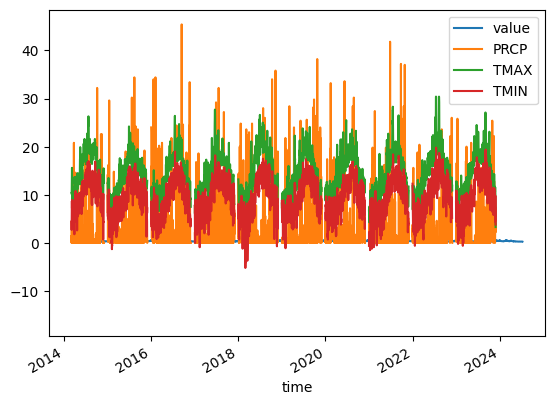

In [10]:
merged_data.set_index('time').plot(y=['value', 'PRCP', 'TMAX', 'TMIN'])


<Axes: xlabel='time'>

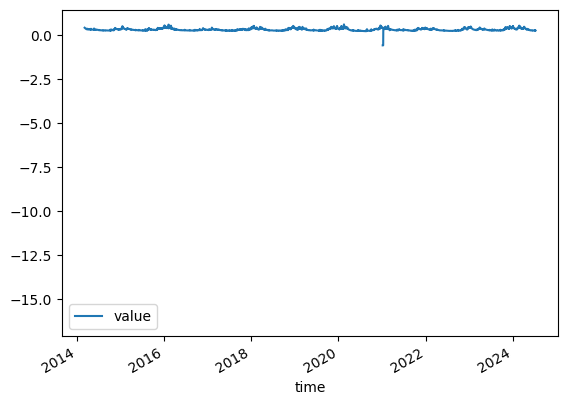

In [11]:
merged_data.set_index('time').plot(y='value')

In [16]:
import pandas as pd

# Example river gauge data (ensure to replace with your actual file path)
river_data = pd.read_csv('get_river_data/data/station_355_clean.csv')  # Assuming your river gauge data has a 'time' column
river_data['time'] = pd.to_datetime(river_data['time'])  # Convert 'time' to datetime

# Prepare weather data
weather_data = df.copy()  # Replace 'df' with your actual NOAA weather data DataFrame
weather_data['date'] = pd.to_datetime(weather_data['date'])

# 1. Check for missing days in the river data
# Set the index as 'time' for river data and then identify any missing days by checking for gaps in the time series
river_data.set_index('time', inplace=True)
river_data_daily = river_data.resample('D').asfreq()  # Resample to daily frequency to find missing days

# Identify missing days in river data
missing_river_days = river_data_daily[river_data_daily.isnull().any(axis=1)].index
print(f"Missing days in river data: {missing_river_days}")

# 2. Check for missing days in the weather data
# Set the index as 'date' for weather data and resample to daily to find missing days
weather_data.set_index('date', inplace=True)
weather_data_daily = weather_data.resample('D').asfreq()

# Identify missing days in weather data
missing_weather_days = weather_data_daily[weather_data_daily.isnull().any(axis=1)].index
print(f"Missing days in weather data: {missing_weather_days}")


Missing days in river data: DatetimeIndex(['2014-03-04', '2014-03-06', '2014-03-07', '2014-03-12',
               '2014-03-14', '2014-03-17', '2014-03-18', '2014-03-22',
               '2014-03-24', '2014-03-26',
               ...
               '2024-06-04', '2024-06-06', '2024-06-11', '2024-06-17',
               '2024-06-22', '2024-06-26', '2024-06-28', '2024-06-29',
               '2024-07-01', '2024-07-08'],
              dtype='datetime64[ns]', name='time', length=1221, freq=None)


ValueError: cannot reindex on an axis with duplicate labels

In [18]:
import os
import pandas as pd

def check_missing_days_in_csv(file_path):
    """Check a single CSV for missing days in the river gauge data."""
    # Read the CSV file
    river_data = pd.read_csv(file_path)
    
    # Convert the 'time' column to datetime (adjust column name if needed)
    river_data['time'] = pd.to_datetime(river_data['time'])
    
    # Resample the data to daily frequency
    river_data_daily = river_data.set_index('time').resample('D').asfreq()
    
    # Find missing days
    missing_days = river_data_daily[river_data_daily.isnull().any(axis=1)].index
    
    return missing_days

def check_missing_days_in_directory(directory):
    """Check all CSV files in a directory for missing days."""
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    files_with_missing_days = {}
    
    for file_name in csv_files:
        file_path = os.path.join(directory, file_name)
        missing_days = check_missing_days_in_csv(file_path)
        
        if len(missing_days) > 0:
            files_with_missing_days[file_name] = len(missing_days)
    
    return files_with_missing_days

# Example usage
directory_path = 'get_river_data/data'  # Replace with your actual directory path
files_with_gaps = check_missing_days_in_directory(directory_path)

# Print the files that have missing days
if files_with_gaps:
    for file_name, num_missing_days in files_with_gaps.items():
        print(f"{file_name} has {num_missing_days} missing days.")
else:
    print("No missing days in any files.")


station_397_clean.csv has 1074 missing days.
station_1352_clean.csv has 1452 missing days.
station_17891_clean.csv has 909 missing days.
station_400_clean.csv has 1271 missing days.
station_1340_clean.csv has 1344 missing days.
station_355_clean.csv has 1221 missing days.
station_382_clean.csv has 1334 missing days.
station_1341_clean.csv has 1327 missing days.
station_384_clean.csv has 1795 missing days.
station_361_clean.csv has 1357 missing days.
station_395_clean.csv has 1002 missing days.
station_364_clean.csv has 781 missing days.
station_370_clean.csv has 1015 missing days.
station_8227_clean.csv has 2838 missing days.
station_398_clean.csv has 1789 missing days.
station_8340_clean.csv has 1154 missing days.
station_393_clean.csv has 1795 missing days.
station_387_clean.csv has 761 missing days.
station_1342_clean.csv has 847 missing days.
station_8256_clean.csv has 1181 missing days.
station_357_clean.csv has 1278 missing days.
station_1335_clean.csv has 986 missing days.
stati

In [19]:
import os
import pandas as pd

def check_missing_days_in_csv(file_path):
    """Check a single CSV for missing days in the river gauge data and calculate the percentage of missing days."""
    # Read the CSV file
    river_data = pd.read_csv(file_path)
    
    # Convert the 'time' column to datetime (adjust column name if needed)
    river_data['time'] = pd.to_datetime(river_data['time'])
    
    # Resample the data to daily frequency
    river_data_daily = river_data.set_index('time').resample('D').asfreq()
    
    # Find missing days
    missing_days = river_data_daily[river_data_daily.isnull().any(axis=1)].index
    
    # Calculate total number of days and percentage of missing days
    total_days = len(river_data_daily)
    missing_percentage = (len(missing_days) / total_days) * 100 if total_days > 0 else 0
    
    return missing_days, missing_percentage

def check_missing_days_in_directory(directory):
    """Check all CSV files in a directory for missing days and calculate their percentages."""
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    files_with_missing_days = {}
    
    for file_name in csv_files:
        file_path = os.path.join(directory, file_name)
        missing_days, missing_percentage = check_missing_days_in_csv(file_path)
        
        if len(missing_days) > 0:
            files_with_missing_days[file_name] = {
                'num_missing_days': len(missing_days),
                'missing_percentage': missing_percentage
            }
    
    return files_with_missing_days

# Example usage
directory_path = 'get_river_data/data'  # Replace with your actual directory path
files_with_gaps = check_missing_days_in_directory(directory_path)

# Print the files that have missing days along with the percentages
if files_with_gaps:
    for file_name, info in files_with_gaps.items():
        print(f"{file_name} has {info['num_missing_days']} missing days ({info['missing_percentage']:.2f}%).")
else:
    print("No missing days in any files.")


station_397_clean.csv has 1074 missing days (28.39%).
station_1352_clean.csv has 1452 missing days (38.38%).
station_17891_clean.csv has 909 missing days (39.30%).
station_400_clean.csv has 1271 missing days (33.60%).
station_1340_clean.csv has 1344 missing days (35.53%).
station_355_clean.csv has 1221 missing days (32.28%).
station_382_clean.csv has 1334 missing days (35.26%).
station_1341_clean.csv has 1327 missing days (35.08%).
station_384_clean.csv has 1795 missing days (47.45%).
station_361_clean.csv has 1357 missing days (35.87%).
station_395_clean.csv has 1002 missing days (34.89%).
station_364_clean.csv has 781 missing days (20.64%).
station_370_clean.csv has 1015 missing days (26.83%).
station_8227_clean.csv has 2838 missing days (75.02%).
station_398_clean.csv has 1789 missing days (47.29%).
station_8340_clean.csv has 1154 missing days (30.50%).
station_393_clean.csv has 1795 missing days (47.45%).
station_387_clean.csv has 761 missing days (20.12%).
station_1342_clean.csv h

In [42]:
import pandas as pd

# Load your cleaned CSV file
file_path = 'gpt_355.csv'  # Update this with the correct path
river_data_cleaned = pd.read_csv(file_path)

# Ensure 'time' is in datetime format
river_data_cleaned['time'] = pd.to_datetime(river_data_cleaned['time'])

# Resample the data to daily frequency
river_data_cleaned_daily = river_data_cleaned.set_index('time').resample('D').asfreq()

# Identify missing days in the cleaned river data
missing_river_days_cleaned = river_data_cleaned_daily[river_data_cleaned_daily.isnull().any(axis=1)].index

# Count the number of missing days
num_missing_days = len(missing_river_days_cleaned)

# Print the missing days and the count
print(f"Missing days in the data: {missing_river_days_cleaned}")
print(f"Total number of missing days: {num_missing_days}")


Missing days in the data: DatetimeIndex(['2014-03-04', '2014-03-06', '2014-03-07', '2014-03-12',
               '2014-03-14', '2014-03-17', '2014-03-18', '2014-03-22',
               '2014-03-24', '2014-03-26',
               ...
               '2024-09-11', '2024-09-14', '2024-09-19', '2024-09-21',
               '2024-09-24', '2024-09-26', '2024-10-01', '2024-10-02',
               '2024-10-03', '2024-10-13'],
              dtype='datetime64[ns]', name='time', length=1260, freq=None)
Total number of missing days: 1260
